In [1]:
import pandas as pd
import numpy as np
import pickle
import re
from nltk.stem import WordNetLemmatizer 
#import sys/
#!conda install --yes --prefix {sys.prefix} anaconda bcolz 
import bcolz

START_TOKEN = '<START>'
END_TOKEN = '<END>'

In [48]:
pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [2]:
def process_news(news):
    _news = news.replace('b\"', "")
    _news = _news.replace('b\'', "")
    _news = _news.lower()
    _news = re.sub("[^a-zA-Z]", " ",_news)
    _news = re.sub('[\s]+', ' ', _news)
    
    _news = _news.split(" ")
    if "" in _news:
        _news.remove("")
    
    #lemmatizer = WordNetLemmatizer() 
    
    #_news = [lemmatizer.lemmatize(w) for w in _news]
    
    _news = ' '.join(_news)
     
    return _news

def read_data():

    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv")
    
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    data = pd.concat(dfs,ignore_index=True)
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    Xy_train = data[:int(len(data)*0.8)]
    Xy_test = data[int(len(data)*0.8):]
    
    return data, Xy_train, Xy_test

def read_data():

    data = pd.read_csv("../Datasets/djia/combined_stock_data.csv")
    
    dfs = []
    data["News"] = ""
    for i in range(1,25):
        col = "Top"+str(i)
        data["News"] = data["News"] +" "+ data[col]
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    data = data[['Date', 'News', 'Tokens', 'Label', 'Subjectivity','Objectivity','Positive','Neutral','Negative']]
    
    stock_prices = "../Datasets/djia/upload_DJIA_table.csv"
    stock_data = pd.read_csv(stock_prices)
    
    print(data.head(2))
    print(stock_data.head(2))
    
    
    #merged_dataframe = data.merge(stock_data, how='inner', on='Date')
    merged_dataframe = pd.merge(data, stock_data, how='inner', on = 'Date')

    
    
    
    Xy_train = merged_dataframe[:int(len(data)*0.8)]
    Xy_test = merged_dataframe[int(len(data)*0.8):]
    
    return merged_dataframe, Xy_train, Xy_test

In [3]:
news,Xy_train, Xy_test = read_data()

         Date                                               News  \
0  2008-08-08   b"Georgia 'downs two Russian warplanes' as co...   
1  2008-08-11   b'Why wont America and Nato help us? If they ...   

                                              Tokens  Label  Subjectivity  \
0  georgia downs two russian warplanes as countri...      0     75.000000   
1  why wont america and nato help us if they wont...      1     83.333333   

   Objectivity   Positive    Neutral   Negative  
0    25.000000  18.750000  25.000000  56.250000  
1    16.666667  41.666667  16.666667  41.666667  
         Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  


In [4]:
news.head(10)

,Date,News,Tokens,Label,Subjectivity,Objectivity,Positive,Neutral,Negative,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as co...",georgia downs two russian warplanes as countri...,0,75.000000,25.000000,18.750000,25.000000,56.250000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,b'Why wont America and Nato help us? If they ...,why wont america and nato help us if they wont...,1,83.333333,16.666667,41.666667,16.666667,41.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,b'Remember that adorable 9-year-old who sang ...,remember that adorable year old who sang at th...,0,56.250000,43.750000,18.750000,43.750000,37.500000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran...,u s refuses israel weapons to attack iran repo...,0,38.461538,61.538462,15.384615,61.538462,23.076923,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,b'All the experts admit that we should legali...,all the experts admit that we should legalise ...,1,45.454545,54.545455,36.363636,54.545455,9.090909,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
5,2008-08-15,"b""Mom of missing gay man: Too bad he's not a ...",mom of missing gay man too bad he s not a year...,1,70.000000,30.000000,10.000000,30.000000,60.000000,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391
6,2008-08-18,"b'In an Afghan prison, the majority of female...",in an afghan prison the majority of female pri...,0,100.000000,0.000000,0.000000,0.000000,100.000000,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648
7,2008-08-19,"b""Man arrested and locked up for five hours a...",man arrested and locked up for five hours afte...,0,22.222222,77.777778,22.222222,77.777778,0.000000,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805
8,2008-08-20,b'Two elderly Chinese women have been sentenc...,two elderly chinese women have been sentenced ...,1,70.000000,30.000000,10.000000,30.000000,60.000000,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688
9,2008-08-21,"b""British resident held in Guantanamo Bay win...",british resident held in guantanamo bay wins l...,1,50.000000,50.000000,20.000000,50.000000,30.000000,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961


### Run to create glove vectors
================================

In [15]:
words = []
idx = 0
word2idx = {}
glove_path = "./glove.6B"
vectors = []#bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.50.dat', mode='w')

with open(f'{glove_path}/glove.6B.50d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)

KeyboardInterrupt: 

In [9]:
vectors = np.array(vectors)
vectors.shape

(400001, 50)

In [10]:
vectors = bcolz.carray(vectors.reshape((400001, 50)), rootdir=f'{glove_path}/6B.50.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'{glove_path}/6B.50_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'{glove_path}/6B.50_idx.pkl', 'wb'))

### End creating glove vectors
===============================
### Open glove vectors

In [6]:
glove_path = "./glove.6B"
vectors = bcolz.open(f'{glove_path}/6B.50.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.50_idx.pkl', 'rb'))

In [7]:
glove = {w: vectors[word2idx[w]] for w in words}

In [8]:
import collections
glove['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [9]:
from collections import Counter
import re
counts = Counter()

def tokenize(news):
    return [START_TOKEN]+news.split(" ")+[END_TOKEN]

news['_Tokens']=news['Tokens'].map(tokenize)
    
for index, row in news.iterrows():
    counts.update(row['_Tokens'])

In [10]:
counts

Counter({'<START>': 1986,
         'georgia': 133,
         'downs': 5,
         'two': 1138,
         'russian': 1171,
         'warplanes': 41,
         'as': 4229,
         'countries': 515,
         'move': 220,
         'to': 25459,
         'brink': 52,
         'of': 22265,
         'war': 1550,
         'breaking': 93,
         'musharraf': 6,
         'be': 3116,
         'impeached': 2,
         'russia': 1640,
         'today': 357,
         'columns': 2,
         'troops': 488,
         'roll': 17,
         'into': 1404,
         'south': 915,
         'ossetia': 38,
         'footage': 118,
         'from': 4239,
         'fighting': 195,
         'youtube': 84,
         'tanks': 97,
         'are': 3420,
         'moving': 65,
         'towards': 94,
         'the': 30896,
         'capital': 253,
         'which': 733,
         'has': 4496,
         'reportedly': 130,
         'been': 1758,
         'completely': 57,
         'destroyed': 124,
         'by': 4955,
      

In [11]:
target_vocab = list(counts.keys())

In [12]:
target_vocab

['<START>',
 'georgia',
 'downs',
 'two',
 'russian',
 'warplanes',
 'as',
 'countries',
 'move',
 'to',
 'brink',
 'of',
 'war',
 'breaking',
 'musharraf',
 'be',
 'impeached',
 'russia',
 'today',
 'columns',
 'troops',
 'roll',
 'into',
 'south',
 'ossetia',
 'footage',
 'from',
 'fighting',
 'youtube',
 'tanks',
 'are',
 'moving',
 'towards',
 'the',
 'capital',
 'which',
 'has',
 'reportedly',
 'been',
 'completely',
 'destroyed',
 'by',
 'georgian',
 'artillery',
 'fire',
 'afghan',
 'children',
 'raped',
 'with',
 'impunity',
 'u',
 'n',
 'official',
 'says',
 'this',
 'is',
 'sick',
 'a',
 'three',
 'year',
 'old',
 'was',
 'and',
 'they',
 'do',
 'nothing',
 'have',
 'entered',
 'whilst',
 'shoots',
 'down',
 'jets',
 'invades',
 'warned',
 'it',
 'would',
 'intervene',
 'on',
 'so',
 's',
 'side',
 'enemy',
 'combatent',
 'trials',
 'but',
 'sham',
 'salim',
 'haman',
 'sentenced',
 'years',
 'will',
 'kept',
 'longer',
 'anyway',
 'just',
 'because',
 'feel',
 'like',
 'retr

In [13]:
emb_dim = 50

In [14]:
matrix_len = len(target_vocab)
weights_matrix = np.zeros((matrix_len, 50))
words_found = 0

for i, word in enumerate(target_vocab):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        weights_matrix[i] = np.random.normal(scale=0.6, size=(emb_dim, ))

In [15]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

def encode_sentence(tokens, vocab2index, N=500):
    
    list_vocab = [x for x in vocab2index.keys()]
    tokens = intersection(tokens, list_vocab)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word) for word in tokens])
    length = min(N, len(enc1))
    try:
        encoded[:length] = enc1[:length]
    except:
        print(length)
        
    #print(tokens)

    return encoded, length

In [16]:
news['_Tokens'].head(5).apply(lambda tokens: np.array(encode_sentence(tokens,word2idx)))

<ipython-input-16-5c18637ba8f0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  news['_Tokens'].head(5).apply(lambda tokens: np.array(encode_sentence(tokens,word2idx)))


0    [[1532, 8132, 55, 467, 8373, 19, 252, 483, 4, ...
1    [[738, 58544, 453, 5, 945, 275, 95, 83, 39, 58...
2    [[2715, 12, 35946, 62, 167, 38, 5751, 22, 0, 8...
3    [[6479, 1534, 6775, 315, 736, 4, 436, 545, 255...
4    [[64, 0, 1232, 6338, 12, 53, 189, 75528, 1603,...
Name: _Tokens, dtype: object

In [17]:
len(news)

1986

In [18]:
news['encoded_tokens'] = news['_Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,word2idx)))

<ipython-input-18-51c8e535137b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  news['encoded_tokens'] = news['_Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,word2idx)))


In [19]:
news['_Tokens'][0]

['<START>',
 'georgia',
 'downs',
 'two',
 'russian',
 'warplanes',
 'as',
 'countries',
 'move',
 'to',
 'brink',
 'of',
 'war',
 'breaking',
 'musharraf',
 'to',
 'be',
 'impeached',
 'russia',
 'today',
 'columns',
 'of',
 'troops',
 'roll',
 'into',
 'south',
 'ossetia',
 'footage',
 'from',
 'fighting',
 'youtube',
 'russian',
 'tanks',
 'are',
 'moving',
 'towards',
 'the',
 'capital',
 'of',
 'south',
 'ossetia',
 'which',
 'has',
 'reportedly',
 'been',
 'completely',
 'destroyed',
 'by',
 'georgian',
 'artillery',
 'fire',
 'afghan',
 'children',
 'raped',
 'with',
 'impunity',
 'u',
 'n',
 'official',
 'says',
 'this',
 'is',
 'sick',
 'a',
 'three',
 'year',
 'old',
 'was',
 'raped',
 'and',
 'they',
 'do',
 'nothing',
 'russian',
 'tanks',
 'have',
 'entered',
 'south',
 'ossetia',
 'whilst',
 'georgia',
 'shoots',
 'down',
 'two',
 'russian',
 'jets',
 'breaking',
 'georgia',
 'invades',
 'south',
 'ossetia',
 'russia',
 'warned',
 'it',
 'would',
 'intervene',
 'on',
 'so

In [20]:
"""import json

news = pd.read_csv("news - bkp.csv", index_col=0)
#news = pd.read_csv("news.csv", index_col=0)

def string_to_json(x):
    x = x.replace("array([","[").replace("])","],")
    return json.loads(x)
news['encoded_tokens'] = news['encoded_tokens'].map(string_to_json)
def is_len_zero(x):
    if x[1]==0:
        #print(x[0])
        
        #print(x[1])
        #print("-------")
        return True
    return False
print(len(news))
news = news[news['encoded_tokens'].map(is_len_zero)==False]

print(len(news))"""


'import json\n\nnews = pd.read_csv("news - bkp.csv", index_col=0)\n#news = pd.read_csv("news.csv", index_col=0)\n\ndef string_to_json(x):\n    x = x.replace("array([","[").replace("])","],")\n    return json.loads(x)\nnews[\'encoded_tokens\'] = news[\'encoded_tokens\'].map(string_to_json)\ndef is_len_zero(x):\n    if x[1]==0:\n        #print(x[0])\n        \n        #print(x[1])\n        #print("-------")\n        return True\n    return False\nprint(len(news))\nnews = news[news[\'encoded_tokens\'].map(is_len_zero)==False]\n\nprint(len(news))'

In [21]:
news['encoded_tokens'].values[0][1]

367

In [22]:
import torch
import torch.nn as nn

In [23]:
#---------------------------------------------------------------------------------------------------------
def create_emb_layer(weights_matrix, non_trainable=False):
    vocab_size, embedding_dim = weights_matrix.shape
    emb_layer = nn.Embedding(vocab_size, embedding_dim )#padding_idx=0)
    emb_layer.weight.data.copy_(torch.from_numpy(weights_matrix).to(device))
    
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer,embedding_dim   

    
#---------------------------------------------------------------------------------------------------------
class LSTM(nn.Module):
    def __init__(self, weights_matrix, hidden_dim, n_layers, 
                 bidirectional):
        
        super().__init__()
        
        self.embedding, embedding_dim = create_emb_layer(weights_matrix, True)
        
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=0.3)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim * 2)
        self.fc2 = nn.Linear(hidden_dim * 2, 1)
        
        self.dropout = nn.Dropout(0.3)
                
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, codes, code_lengths):
        
        embedded_codes = self.dropout(self.embedding(codes))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded_codes, code_lengths, batch_first=True, enforce_sorted=False)

        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        fc1_out = self.fc1(hidden)
        
        
        hidden2 = self.sigmoid(fc1_out)
        
        fc2_out = self.fc2(hidden2)
        
        sigmoid_out = self.sigmoid(fc2_out)
            
        return sigmoid_out
    

In [24]:
import datetime
import torch.optim as optim

def train_model(model, val_dl, epochs=10, lr=0.0001):
    directory = datetime.datetime.now().strftime("%X").replace(":","_")

    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = optim.Adam(parameters, lr=lr)
    loss_list = []
    f_list = []
    for epoch in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x,y,l in train_dl:
            x = x.long()
            y = y.long()
            y = y.flatten()
            y = torch.tensor(y, dtype=torch.float) 
            x,l = x.to(device),l.to(device)

            y_pred = model(x,l)
            y_pred = y_pred.cpu()
            optimizer.zero_grad()
            
            loss = nn.BCELoss()(y_pred, y)
            #loss = nn.BCEWithLogitsLoss()(y_pred, y.reshape(-1,1))
            
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        loss_list.append(sum_loss/total)
        val_loss, val_acc, f = validation_metrics(model, val_dl)
        if epoch % 5 == 1:
            print("Epoch: "+str(epoch))
            print("train loss %.3f, val loss %.3f, and val accuracy %.3f " % (sum_loss/total, val_loss, val_acc))
            #print("Recall: "+ str(f["recall"]))
            #print("Precision: "+ str(f["precision"]))
            print("F-measure: "+ str(f["f_measure"]))
            
            save_model(directory,model,optimizer,epoch, loss, f["f_measure"])
            f_list.append(f["f_measure"])

    return loss_list, f_list
def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x,y,l in valid_dl:
        x = x.long()
        y = y.long()
        y = y.flatten()
        y = torch.tensor(y, dtype=torch.float)  
        x,l = x.to(device), l.to(device)

        
        y_hat = model(x,l)
        y_hat = y_hat.cpu()
        
        loss = nn.BCELoss()(y_hat, y)
        #loss = nn.BCEWithLogitsLoss()(y_hat, y.reshape(-1,1))
        #print(y_hat)
        pred = (y_hat>0.5).float()
        #pred = torch.round(torch.sigmoid(y_hat))
        #print(pred.shape)
        #print(pred)
        y = y.reshape(-1,1)
        tp += ((pred == 1)&(y == 1)).float().sum() 
        tn += ((pred == 0)&(y == 0)).float().sum() 
        fp += ((pred == 1)&(y == 0)).float().sum() 
        fn += ((pred == 0)&(y == 1)).float().sum() 
        
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
        
    print(tp)
    print(fp)
    print(tn)
    print(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f_measure = (2 * precision * recall) / (precision + recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
        
    f = {"precision": precision.item(), "recall":recall.item(), "f_measure": f_measure.item(), "accuracy": accuracy.item()}
    return sum_loss/total, accuracy, f

In [25]:
# Create target Directory if don't exist
import os 

def save_model(directory, model,optimizer, epoch, loss, val_f_measure):
    dirName = "models/"+datetime.datetime.now().strftime("%x").replace("/","_")

    if not os.path.exists(dirName):
        os.mkdir(dirName)
        
    if not os.path.exists(dirName + "/"+directory):
        os.mkdir(dirName + "/"+directory) 
    
    PATH = dirName + "/"+directory+"/"+datetime.datetime.now().strftime("%X").replace(":","_")
       
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                'val_f_measure': val_f_measure
                }, PATH)

In [26]:
from torch.utils.data import Dataset, DataLoader
class CodesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        """print(self.X[idx])
        print(self.X[idx][0])
        print(self.X[idx][1])"""
        if self.X[idx][1]==0:
            print(self.X[idx][0])
        return torch.from_numpy(np.array(self.X[idx][0]).astype(np.int32)), self.y[idx], self.X[idx][1] 

In [27]:
from sklearn.model_selection import train_test_split
X = news['encoded_tokens'].values
y = news['Label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [28]:
train_ds = CodesDataset(X_train[:10000], y_train[:10000])
test_ds = CodesDataset(X_test[:2000], y_test[:2000])

In [29]:
batch_size = 1000

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [30]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [31]:
"""glove_path = "./glove.6B"
vectors = bcolz.open(f'{glove_path}/6B.50.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.50_idx.pkl', 'rb'))"""

'glove_path = "./glove.6B"\nvectors = bcolz.open(f\'{glove_path}/6B.50.dat\')[:]\nwords = pickle.load(open(f\'{glove_path}/6B.50_words.pkl\', \'rb\'))\nword2idx = pickle.load(open(f\'{glove_path}/6B.50_idx.pkl\', \'rb\'))'

In [32]:
CODE_WEIGHT_METRIX = vectors

HIDDEN_DIM = 50
N_LAYERS = 2
BIDIRECTIONAL = True

model = LSTM(CODE_WEIGHT_METRIX,
            HIDDEN_DIM,
            N_LAYERS, 
            BIDIRECTIONAL)
model.to(device)

LSTM(
  (embedding): Embedding(400001, 50)
  (lstm): LSTM(50, 50, num_layers=2, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [33]:
loss_list, f_list = train_model(model, test_dl, epochs=300, lr=0.05)

<ipython-input-24-0e3faee1ed11>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


RuntimeError: CUDA out of memory. Tried to allocate 1.73 GiB (GPU 0; 3.00 GiB total capacity; 1.04 GiB already allocated; 1001.91 MiB free; 1.12 GiB reserved in total by PyTorch)

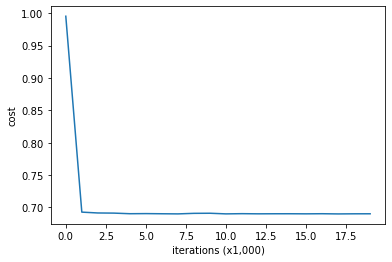

In [17]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list[:20])
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

In [19]:
len(news[news['Label']==0])

21662

In [20]:
len(news[news['Label']==1])

24959

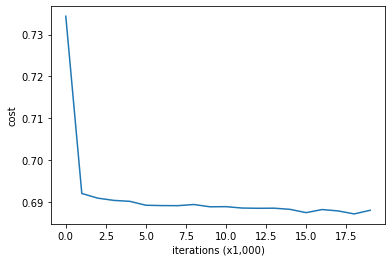

In [134]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list[:20])
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

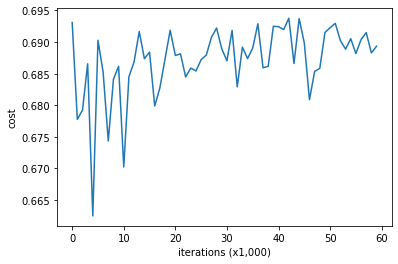

In [130]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(f_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

* https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76